#**Libraries**

In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 5.4 MB/s 


#**DATA**

In [ ]:
Total_Day_Data = pd.read_csv("city_day.csv")
Total_Day_Data['Date'] = pd.to_datetime(Total_Day_Data['Date'], errors='coerce')
Total_Day_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
# Finding Columns with too many Null values
column_counts = Total_Day_Data.count()
All_columns = column_counts.index
columns_data_counts = column_counts.values
Null_heavy_columns = []
for x in range(len(All_columns)):
  if ((columns_data_counts[x]/columns_data_counts[0])*100) <70:
    Null_heavy_columns.append(All_columns[x])
print("Columns with more than 30% Null values are", Null_heavy_columns)
Nulls_data = pd.DataFrame(Total_Day_Data.isnull().sum().sort_values(ascending = False))
Nulls_data = Nulls_data.rename(columns = {0:"Null Values"})
Nulls_data.style.background_gradient(cmap='Reds')

Columns with more than 30% Null values are ['PM10', 'NH3', 'Xylene']


,Null Values
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


In [ ]:
# Examining the data w.r.t Cities
Cities = Total_Day_Data.City.unique()
Day_Data_Overview = Total_Day_Data.groupby('City').count()
print("Number of Cities:", len(Cities))
Day_Data_Overview

Number of Cities: 26


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2009,1381,407,1400,1401,1415,0,1400,1369,1324,1526,1526,1525,1334,1334
Aizawl,113,111,112,113,113,113,113,113,113,104,98,98,0,111,111
Amaravati,951,892,896,896,896,896,896,854,886,896,876,876,682,841,841
Amritsar,1221,1093,1158,1128,1177,932,1179,1145,1053,1106,1026,1009,1008,1126,1126
Bengaluru,2009,1863,1649,2003,2003,2005,1806,1998,2003,1865,1743,1916,0,1910,1910
Bhopal,289,280,280,280,280,280,280,280,280,280,0,0,0,278,278
Brajrajnagar,938,753,765,695,704,763,712,788,745,735,765,0,0,713,713
Chandigarh,304,289,304,300,300,300,294,304,304,304,304,304,304,299,299
Chennai,2009,1892,302,1973,1973,1973,1547,1984,1973,1960,1724,1756,0,1884,1884


In [ ]:
# Cleaning Dataset for Analysis
# Removing Cities with less data
Major_Cities = Day_Data_Overview.loc[Day_Data_Overview['Date']>800].index
Major_Cities = Major_Cities.values
Minor_Cities = Day_Data_Overview.loc[Day_Data_Overview['Date']<=800].index
Major_Cities_Data = Total_Day_Data.set_index('City').drop(Minor_Cities, axis = 0)
Major_Cities_Data.reset_index(inplace=True)
Major_Cities_Data.set_index('Date', inplace=True)
Percentage_Null = pd.DataFrame(100*Major_Cities_Data.isnull().sum()/Major_Cities_Data.City.shape)
Percentage_Null = Percentage_Null.rename(columns={0:'% Null'})
print("Null Values in Major Cities Data")
Percentage_Null.style.background_gradient(cmap='Reds')

Null Values in Major Cities Data


,% Null
City,0.000000
PM2.5,16.463392
PM10,40.471743
NO,12.628649
NO2,12.599348
NOx,15.126543
NH3,37.014248
CO,7.358166
SO2,13.855620
O3,13.851958


In [ ]:
# Dropping Pollutant columns with too many Nulls
Major_Cities_Data = Major_Cities_Data.drop(['Xylene','NH3'], axis = 1)
# Dropping Pollutant columns with less significant pollutants
Major_Cities_Data['BeTo'] = Major_Cities_Data['Benzene']+Major_Cities_Data['Toluene']
Major_Cities_Data = Major_Cities_Data.drop(['NO', 'NOx', 'Benzene', 'Toluene'], axis =1)


In [ ]:
Main_Pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'BeTo']
print(Major_Cities)
Major_Cities_Data

['Ahmedabad' 'Amaravati' 'Amritsar' 'Bengaluru' 'Brajrajnagar' 'Chennai'
 'Delhi' 'Gurugram' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kolkata' 'Lucknow'
 'Mumbai' 'Patna' 'Talcher' 'Thiruvananthapuram' 'Visakhapatnam']


,City,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,BeTo
Date,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,18.22,0.92,27.64,133.36,NaN,NaN,0.02
2015-01-02,Ahmedabad,NaN,NaN,15.69,0.97,24.55,34.06,NaN,NaN,9.18
2015-01-03,Ahmedabad,NaN,NaN,19.30,17.40,29.07,30.70,NaN,NaN,23.20
2015-01-04,Ahmedabad,NaN,NaN,18.48,1.70,18.59,36.08,NaN,NaN,14.57
2015-01-05,Ahmedabad,NaN,NaN,21.42,22.10,39.33,39.31,NaN,NaN,25.90
...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,25.06,0.47,8.55,23.30,41.0,Good,14.31
2020-06-28,Visakhapatnam,24.38,74.09,26.06,0.52,12.72,30.14,70.0,Satisfactory,2.95
2020-06-29,Visakhapatnam,22.91,65.73,29.53,0.48,8.42,30.96,68.0,Satisfactory,0.02


We have 27303 data points spanning from 2015 to 2020.

7 Major Pollutants - PM2.5, PM10, NO2, SO2, CO, O3, BeTo.

1 Air Quality Indicator & corresponding Air Quality Category.


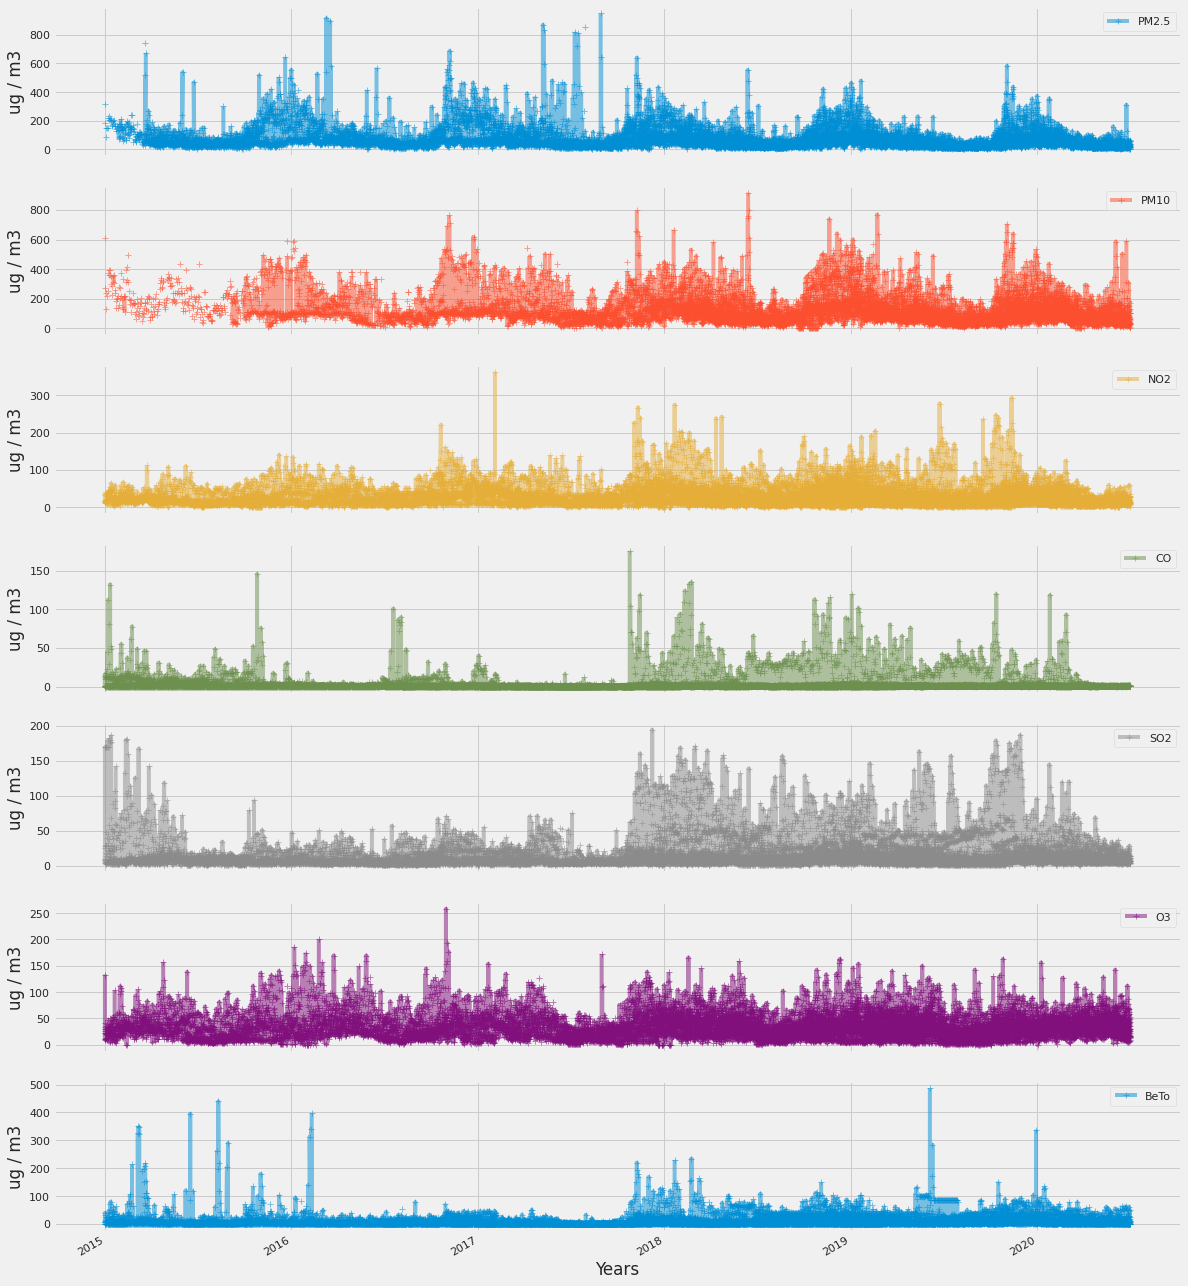

In [ ]:
axes = Major_Cities_Data[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

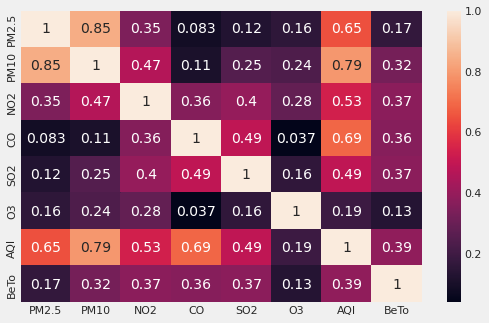

In [ ]:
sns.heatmap(Major_Cities_Data.corr() ,annot =True);
# clean_city = Major_Cities_Data.replace(' ',np.nan)
# clean_city = clean_city.dropna(how='any') 
# sns.heatmap(clean_city.corr() ,annot =True);
# clean_city

In [ ]:
# axes = clean_city[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
# for ax in axes:
#     ax.set_xlabel('Years')
#     ax.set_ylabel('ug / m3')

#**Imputation Methods**



##Forward Fill

In [ ]:
City_ffill = Major_Cities_Data.fillna(method='ffill')
City_ffill
City_ffill.isnull().sum()

City             0
PM2.5           27
PM10          1594
NO2              0
CO               0
SO2              0
O3               0
AQI             28
AQI_Bucket      28
BeTo             0
dtype: int64

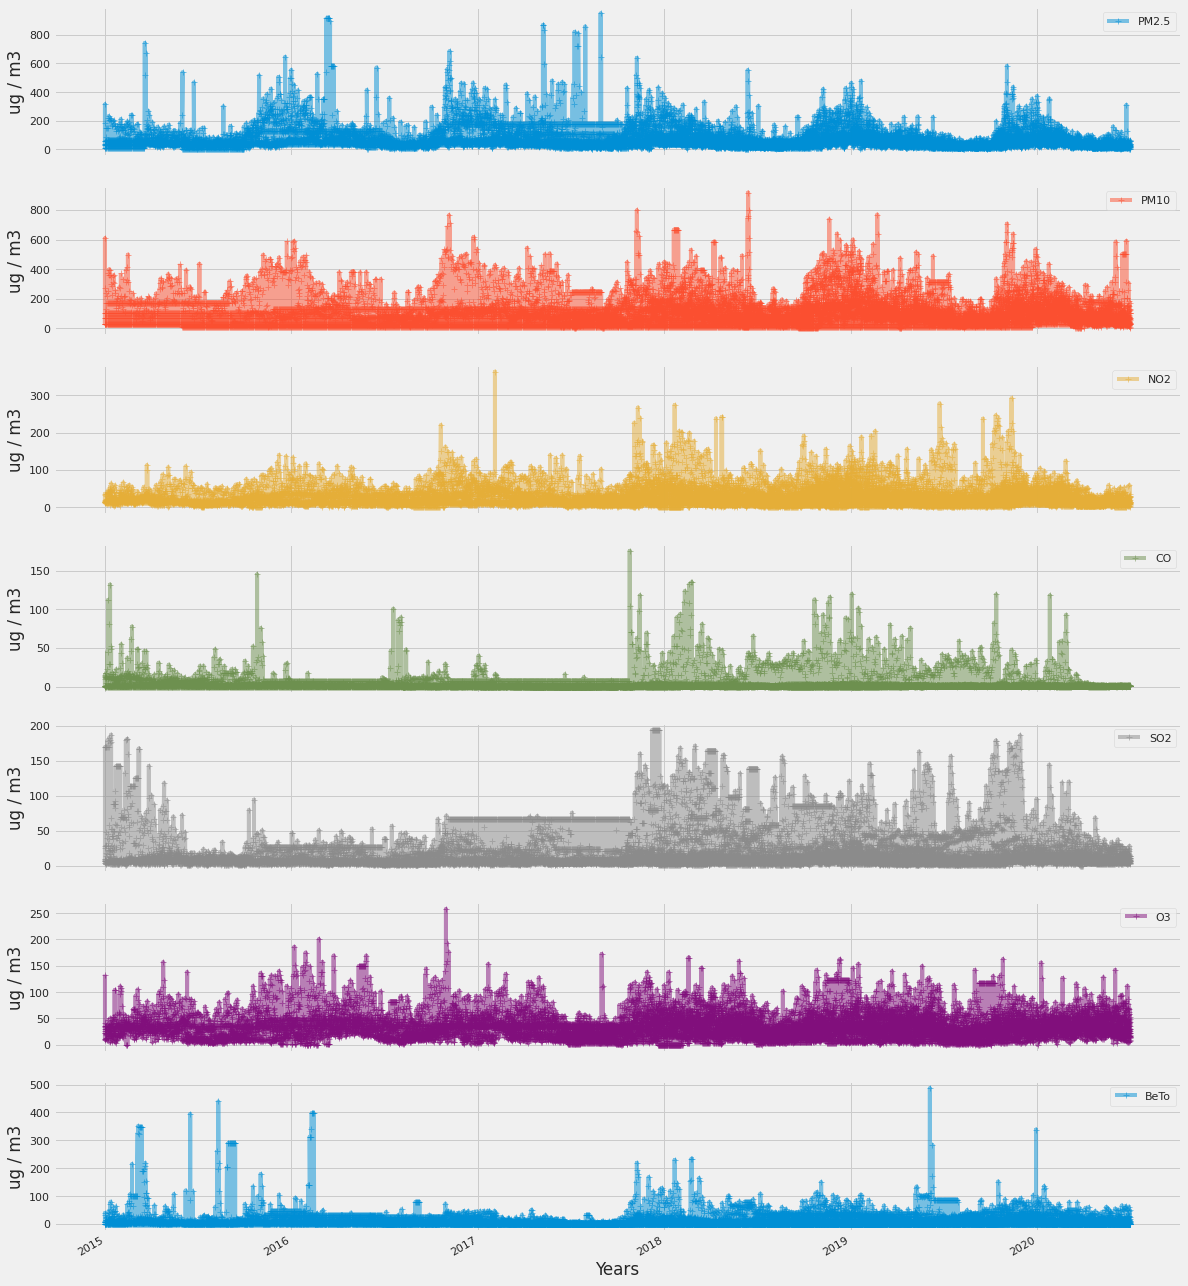

In [ ]:
axes = City_ffill[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

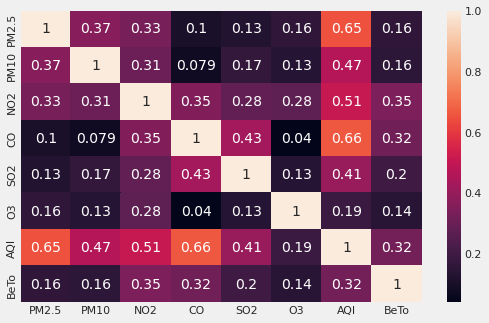

In [ ]:
sns.heatmap(City_ffill.corr() ,annot =True);

Many Null Values still exists and Correlation of pollutants with AQI doesn't imrpove.

##Back Fill

In [ ]:
City_bfill = Major_Cities_Data.fillna(method='bfill')
City_bfill
City_bfill.isnull().sum()

City          0
PM2.5         0
PM10          0
NO2           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
BeTo          1
dtype: int64

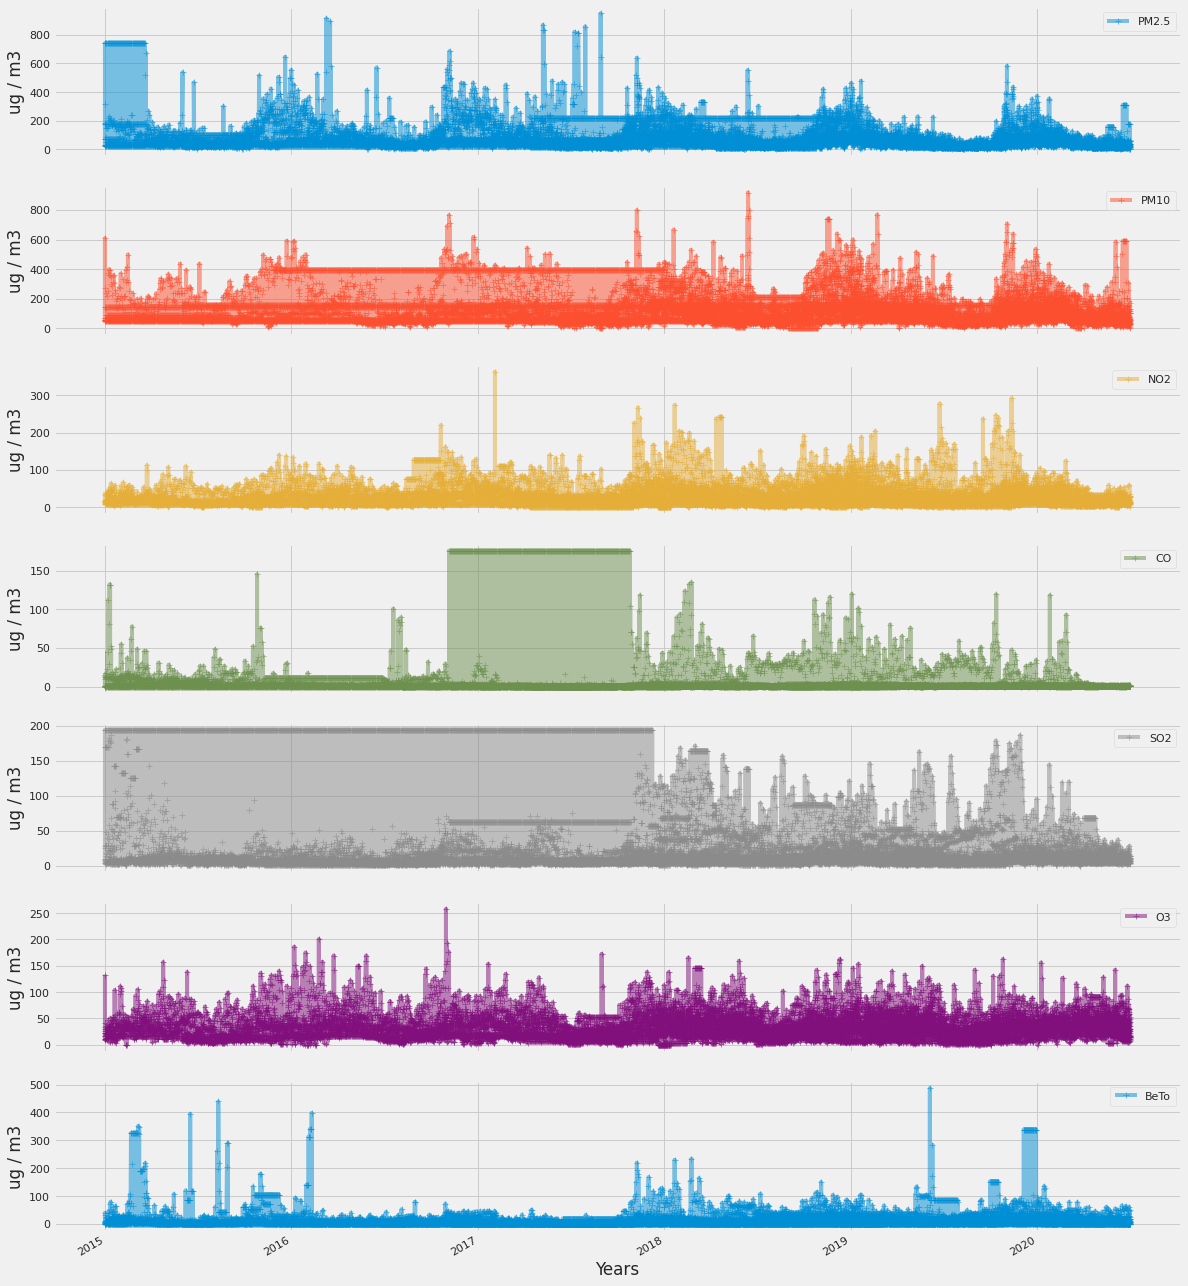

In [ ]:
axes = City_bfill[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

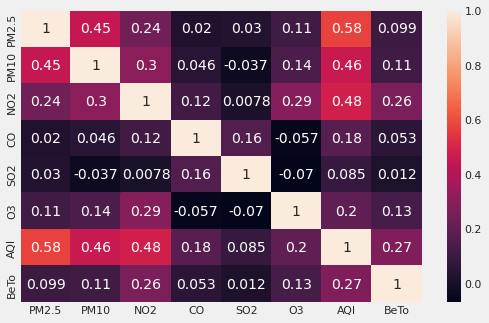

In [ ]:
sns.heatmap(City_bfill.corr() ,annot =True);

Even-though all Nulls are filled, large amounts of wrong data comes into the mix. It is clearly visible in the above pollutant charts. Correaltion between pollutants and AQI measure is badly affected.

##Linear Interpolation



In [ ]:
City_interpol = Major_Cities_Data.interpolate(limit_direction="both")
City_interpol
City_interpol.isnull().sum()

City             0
PM2.5            0
PM10             0
NO2              0
CO               0
SO2              0
O3               0
AQI              0
AQI_Bucket    4496
BeTo             0
dtype: int64

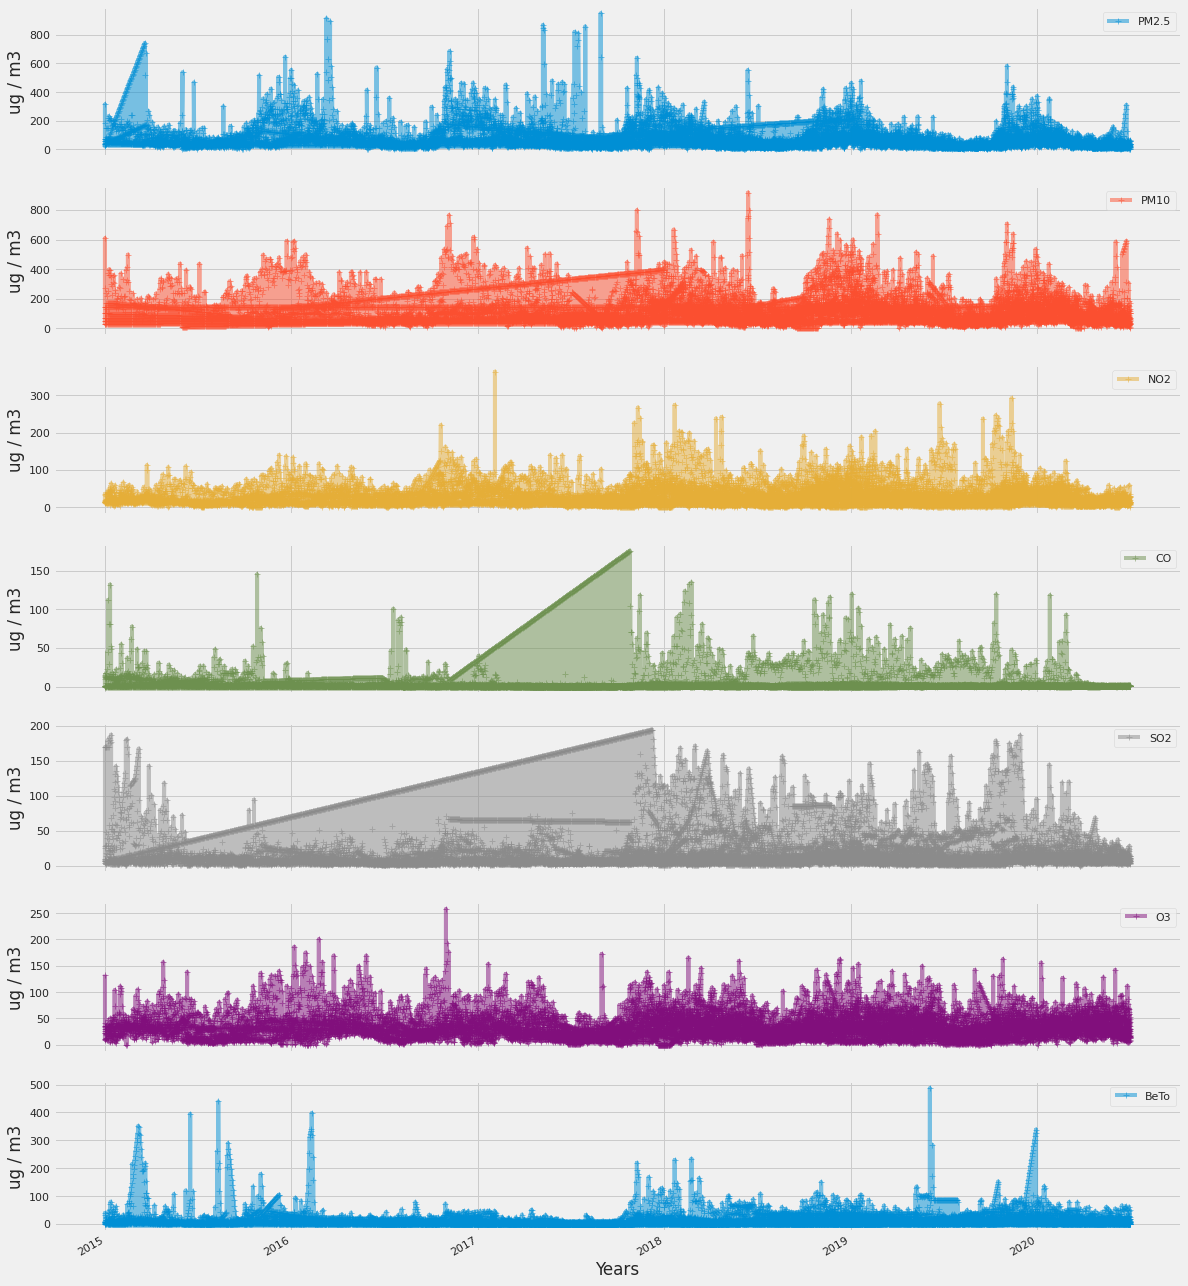

In [ ]:
axes = City_interpol[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

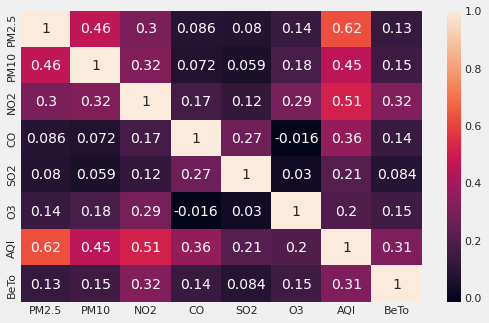

In [ ]:
sns.heatmap(City_interpol.corr() ,annot =True);

The increasing order of the imputed data adds too many wrong datapoints to the mix.

##K-Nearest Neighbor Imputation

In [ ]:
from sklearn.impute import KNNImputer
City_KNN = Major_Cities_Data.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
City_KNN['PM2.5'] = knn_imputer.fit_transform(City_KNN[['PM2.5']])
City_KNN['PM10'] = knn_imputer.fit_transform(City_KNN[['PM10']])
City_KNN['O3'] = knn_imputer.fit_transform(City_KNN[['O3']])
City_KNN['AQI'] = knn_imputer.fit_transform(City_KNN[['AQI']])
City_KNN.isnull().sum()

City             0
PM2.5            0
PM10             0
NO2           3440
CO            2009
SO2           3783
O3               0
AQI              0
AQI_Bucket    4496
BeTo          7443
dtype: int64

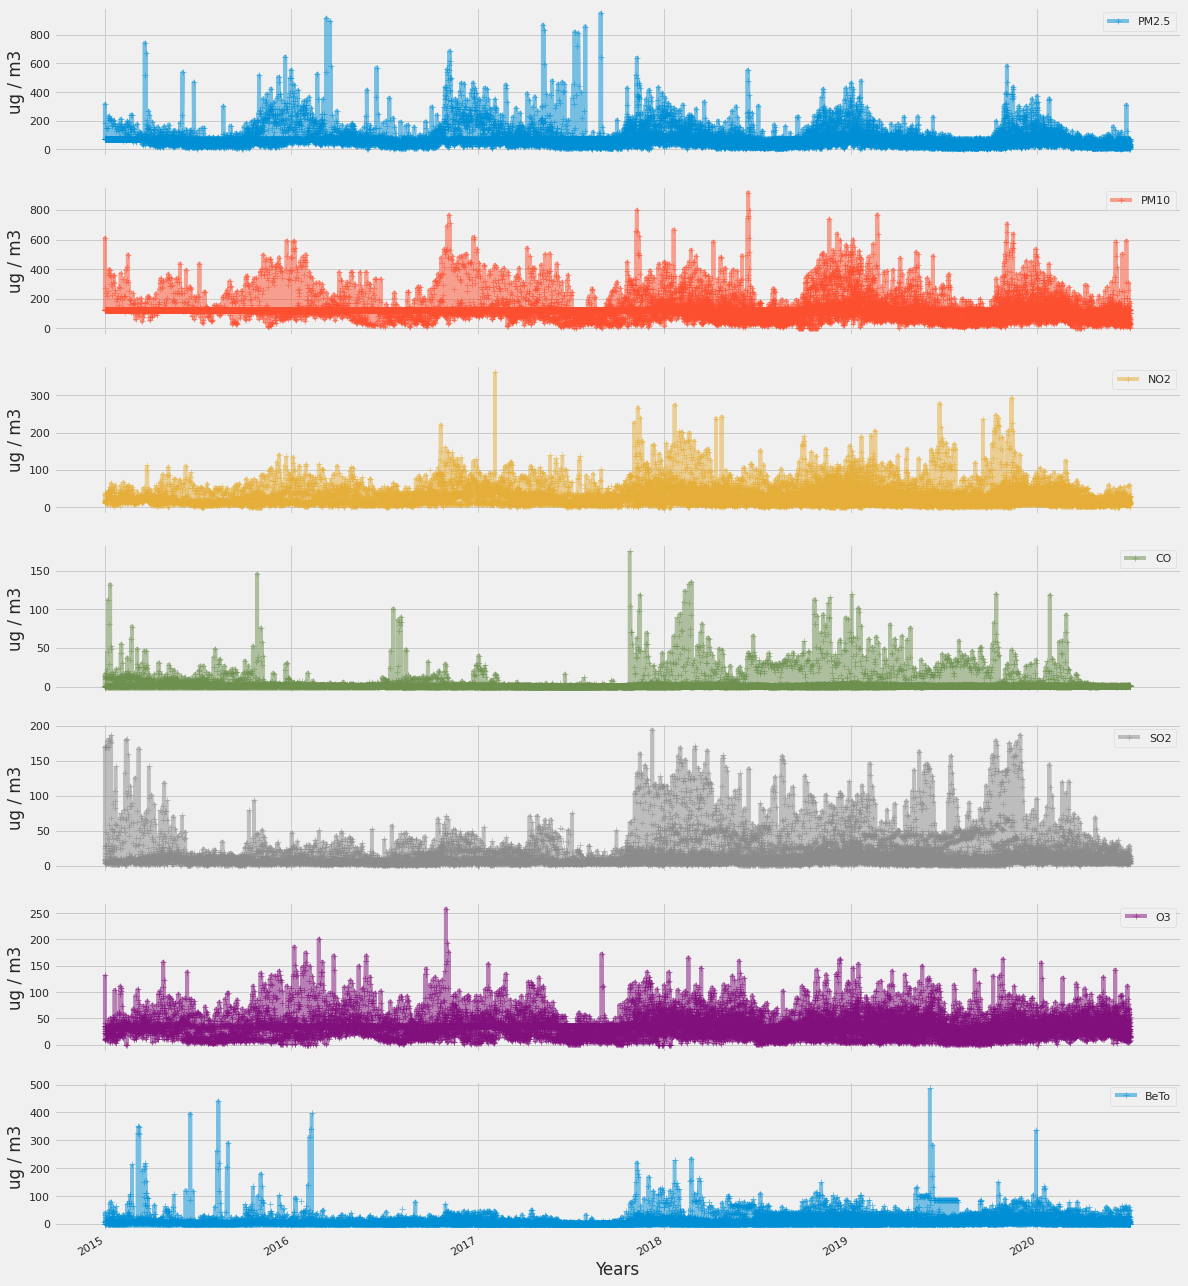

In [ ]:
axes = City_KNN[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

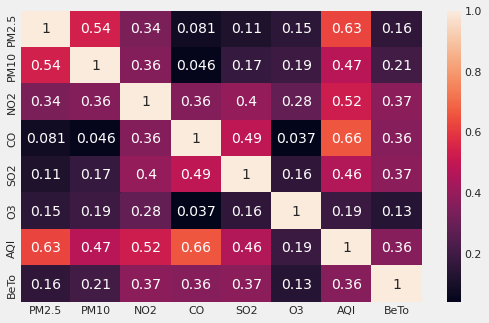

In [ ]:
sns.heatmap(City_KNN.corr() ,annot =True);

AQI is a measure of pollutants present in the air. There is clear decrease in correlation between AQI index and pollutants. Therefore, we can consider that there is no great help with this imputation.

##Multivariate Feature Imputation (MICE)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
City_mice = Major_Cities_Data.copy(deep=True)

mice_imputer = IterativeImputer()
City_mice['PM2.5'] = mice_imputer.fit_transform(City_mice[['PM2.5']])
City_mice['PM10'] = mice_imputer.fit_transform(City_mice[['PM10']])
City_mice['O3'] = mice_imputer.fit_transform(City_mice[['O3']])
City_mice['SO2'] = mice_imputer.fit_transform(City_mice[['SO2']])
City_mice['AQI'] = mice_imputer.fit_transform(City_mice[['AQI']])
City_mice.isnull().sum()

City             0
PM2.5            0
PM10             0
NO2           3440
CO            2009
SO2              0
O3               0
AQI              0
AQI_Bucket    4496
BeTo          7443
dtype: int64

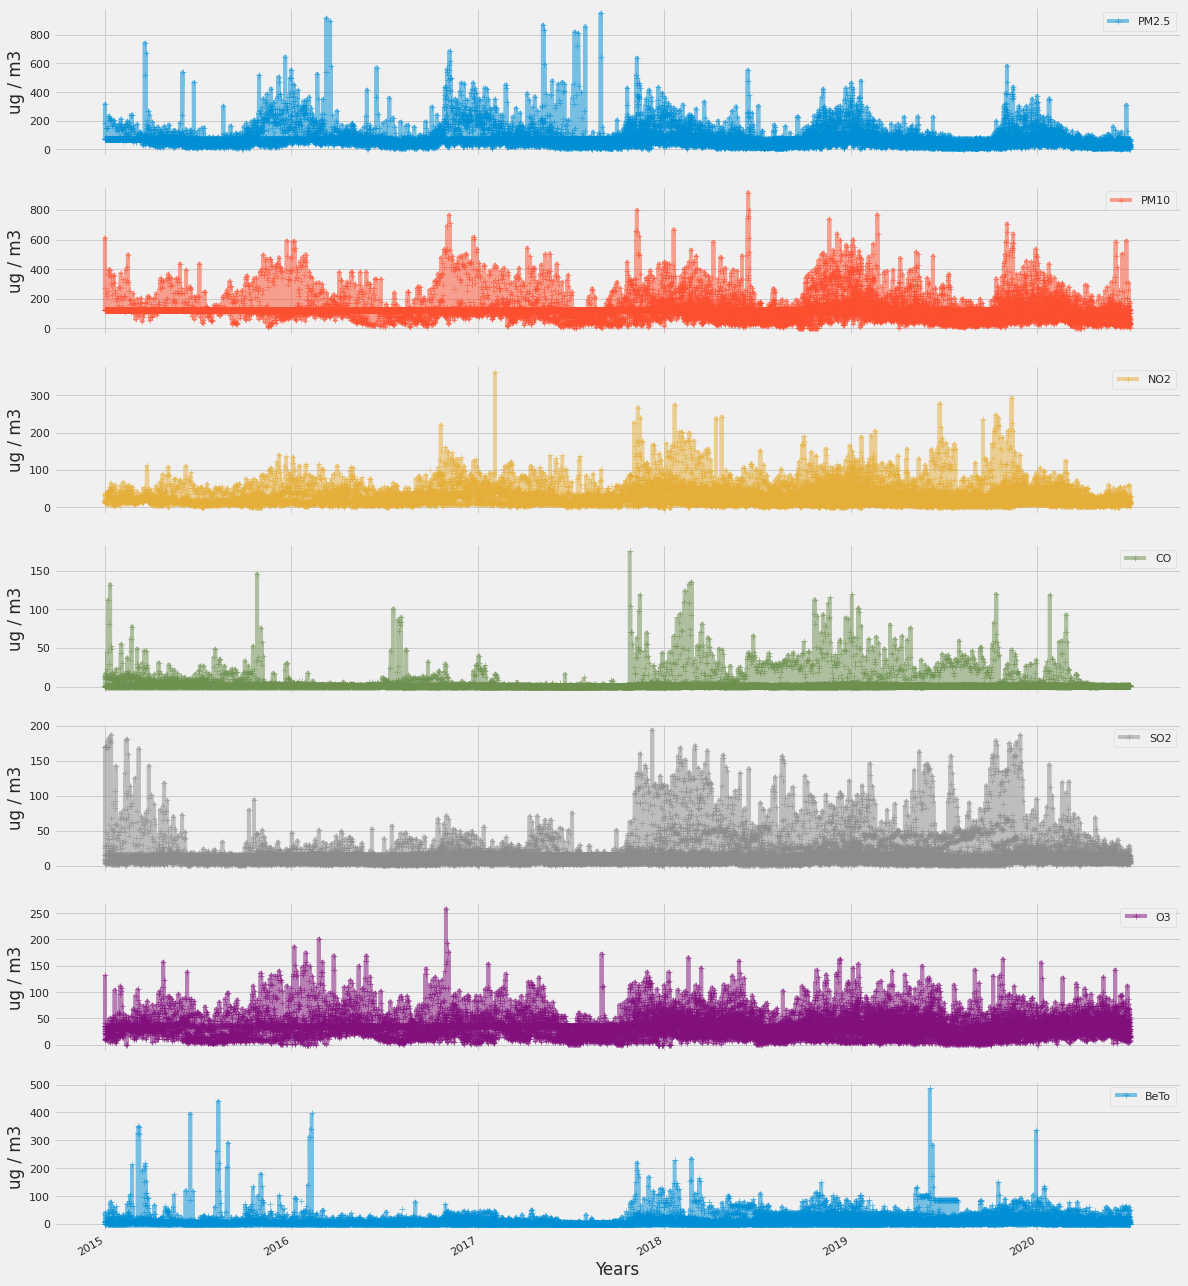

In [ ]:
axes = City_mice[Main_Pollutants].plot(marker='+', alpha=0.5, figsize=(18, 25), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

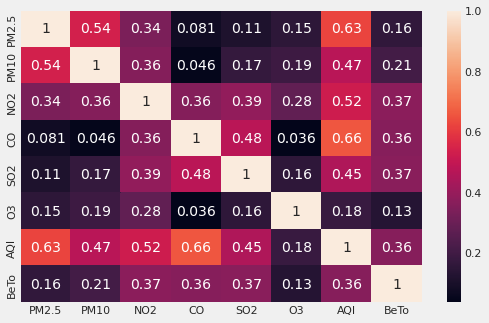

In [ ]:
sns.heatmap(City_mice.corr() ,annot =True);

The correlation falls even below that of KNN Imputation.

#**Trend Analysis**


In [ ]:
def trend_plot(dataframe,value):
    
    # Prepare data
    dataframe['year'] = [d.year for d in dataframe.Date]
    dataframe['month'] = [d.strftime('%b') for d in dataframe.Date]
    years = dataframe['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=dataframe, ax=axes[0])
    sns.pointplot(x='month', y=value, data=dataframe.loc[~dataframe.year.isin([2015, 2019]), :])
    # sns.pointplot(x='month', y=value, data=dataframe.loc[~dataframe.year.isin([2020]), :], color='green')

    # Set Title
    axes[0].set_title('Year-wise Box Plot', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(Seasonality)', fontsize=18)
    plt.show()

##**PM2.5**

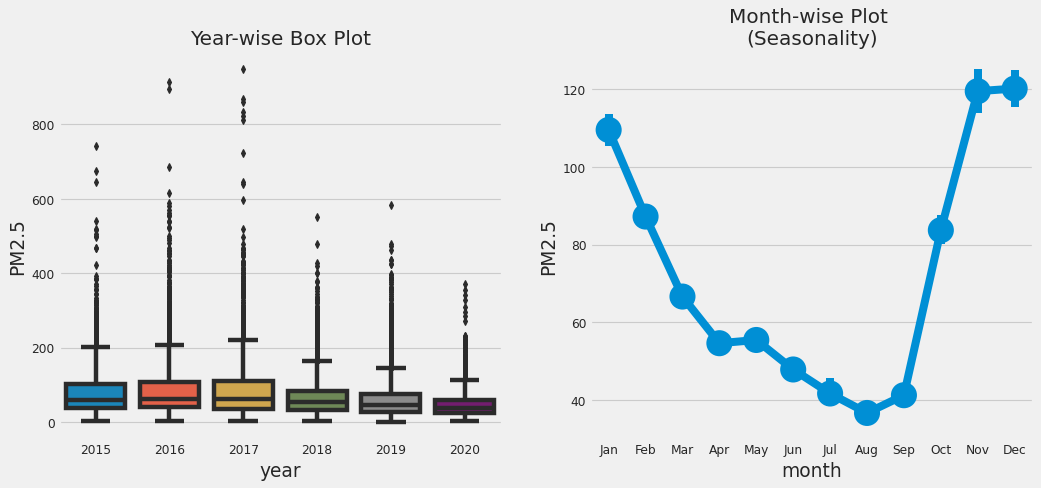

In [ ]:
pollutant_trend = Major_Cities_Data.copy()
pollutant_trend.reset_index(inplace=True)
pollutant = 'PM2.5'
trend_plot(pollutant_trend,pollutant)

Across 26 major cities in India, on average the accumilation of PM2.5 particulates in air peaks during the winter months. It then slides gradually over the summer and will hit lowest PM2.5 concentration during the peaks of monsoon rains. Following the Indian festivals and harvest season's residue burning propels the levels of PM2.5 upwards very sharply .

##**PM10**

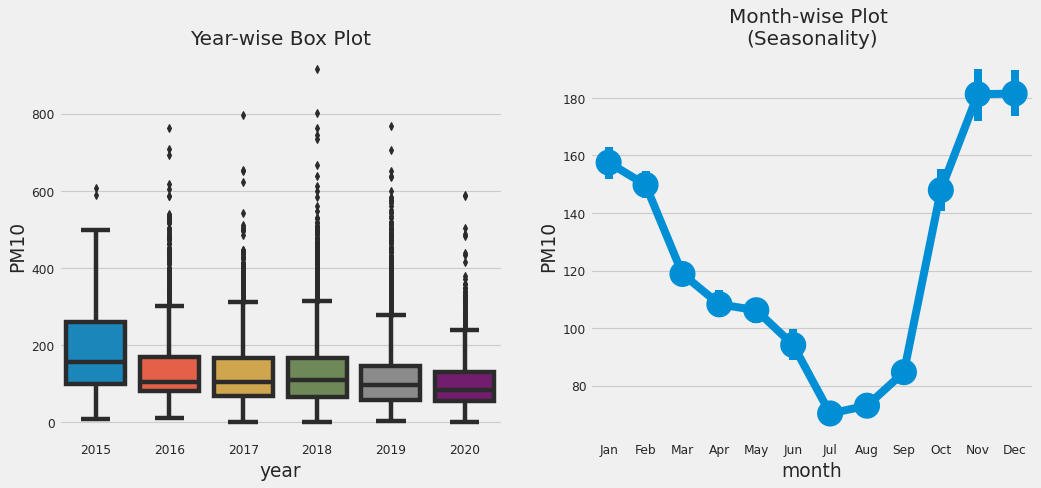

In [ ]:
pollutant = 'PM10'
trend_plot(pollutant_trend,pollutant)

PM10 quitely follows the same pattern of PM2.5 as both are very closely related.

##**O3**

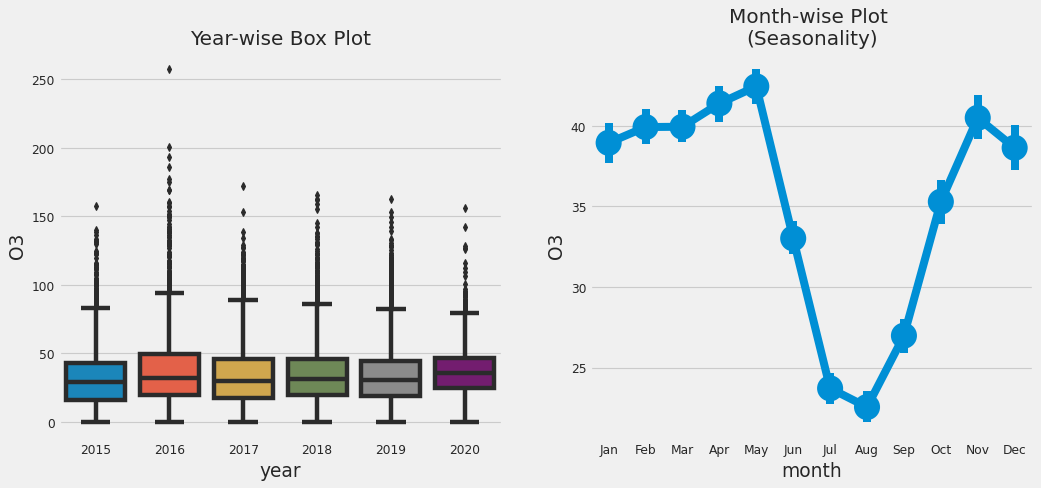

In [ ]:
pollutant = 'O3'
trend_plot(pollutant_trend,pollutant)

Ozone levels in air peaks during the summer season when all major Indian cities records high temperatures. The levels of Ozone (O3) only dips during Monsoon rains.

##**SO2**

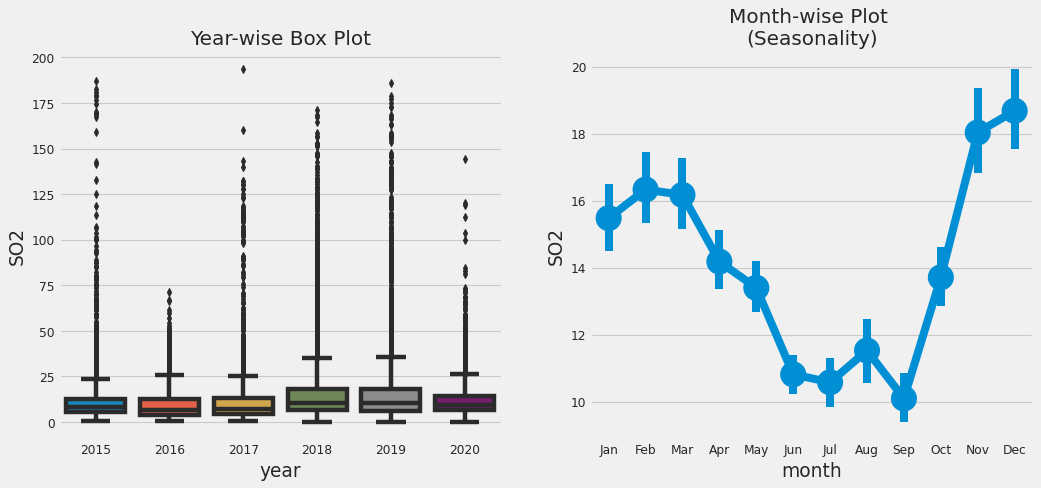

In [ ]:
pollutant = 'SO2'
trend_plot(pollutant_trend,pollutant)

##**NO2**

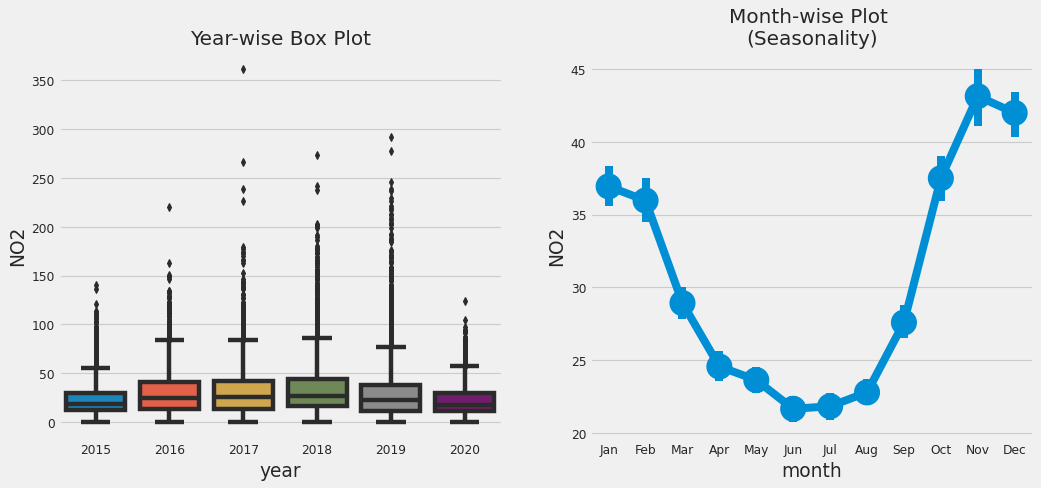

In [ ]:
pollutant = 'NO2'
trend_plot(pollutant_trend,pollutant)

The peak levels of NO2 coincides with the Indian crop harvest season and the festival of lights (Diwali) which people celebrate by burning too many fireworks across the country. 

##**CO**

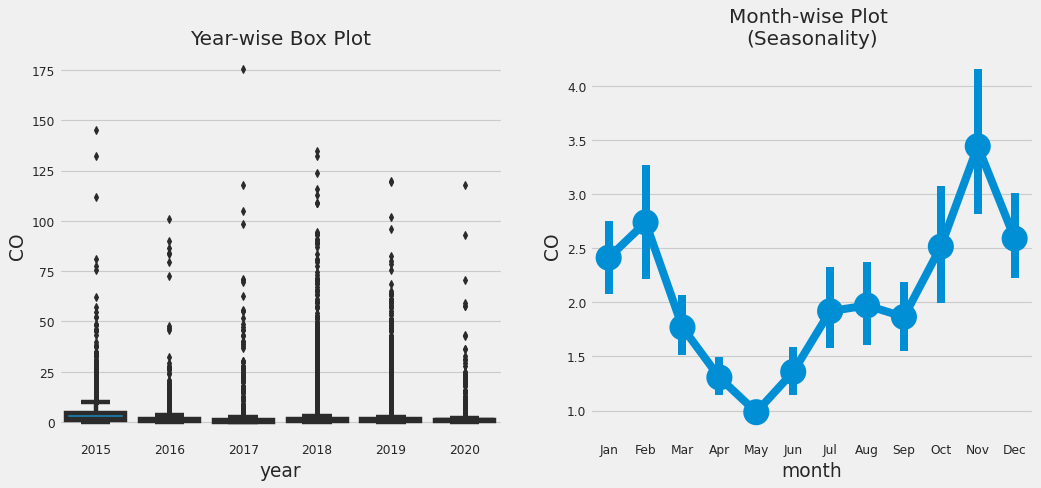

In [ ]:
pollutant = 'CO'
trend_plot(pollutant_trend,pollutant)

#**Highly Polluted Cities**

In [ ]:
def max_polluted_city(pollutant):
    x1 = Major_Cities_Data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
o3 = max_polluted_city('O3')
beto = max_polluted_city('BeTo')


display_side_by_side(pm2_5,pm10,no2,so2,co,o3,beto)

,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,109.710000
4,Ahmedabad,67.850000
5,Kolkata,64.360000
6,Jorapokhar,64.230000
7,Brajrajnagar,64.060000
8,Talcher,61.410000
9,Amritsar,55.470000
